## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
import os

# Study data files
mouse_file = os.path.join("data", "Mouse_metadata.csv")
study_file = os.path.join("data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_file)
study_results = pd.read_csv(study_file)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_total = merge_df['Mouse ID'].nunique()
print(f'There are a total of {mice_total} mice in this study.')

There are a total of 249 mice in this study.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = merge_df.loc[merge_df['Mouse ID'] == 'g989']
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[merge_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df['Mouse ID'].nunique()
print(f'There are now a total of {clean_mice} mice in this study after dropping duplicates.')

There are now a total of 248 mice in this study after dropping duplicates.


## Summary Statistics

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
SEM = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary dataframe.
sum_tumor_vol_df = pd.DataFrame({'Mean Tumor Vol': mean, 
                                 'Median Tumor Vol': median, 
                                 'Variance Tumor Vol': variance, 
                                 'Standard Deviation': std, 
                                 'Standard Error of Tumor Vol': SEM
                                })
sum_tumor_vol_df

,Mean Tumor Vol,Median Tumor Vol,Variance Tumor Vol,Standard Deviation,Standard Error of Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
sum_tum_agg = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
sum_tum_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

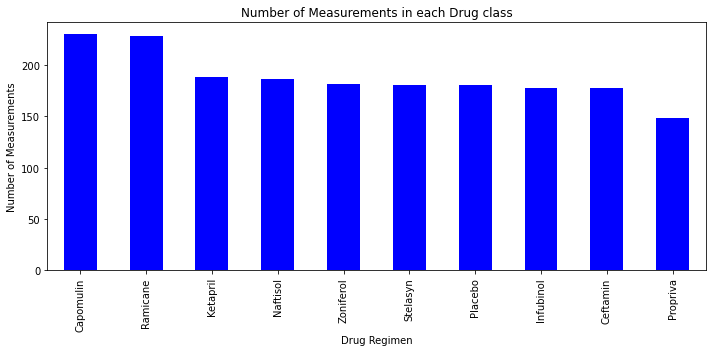

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#find number of mice in each drug regimen
grouped_drug = clean_df.groupby(['Drug Regimen'])
count_points = grouped_drug['Timepoint'].count()
count_points = count_points.sort_values(ascending=False)

#make a bar graph using pandas with labels
ax = count_points.plot(kind='bar', color='blue', figsize= (10,5), title='Number of Measurements in each Drug class')

#set labels
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Measurements')

#display bar graph
plt.tight_layout()
plt.show()

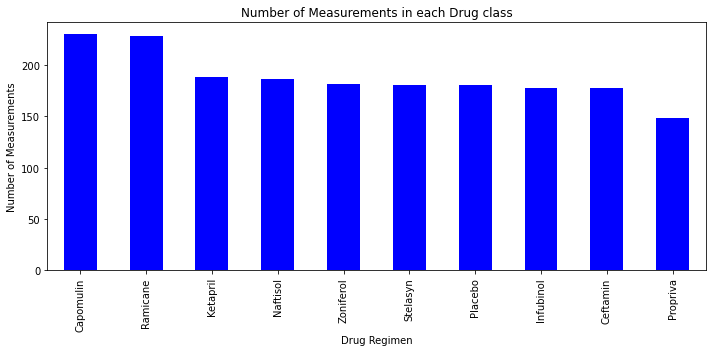

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#create x and y axis
x_axis = count_points.index
y_axis = count_points.values

#make fig size same as pandas plot
plt.figure(figsize=(10,5))

#create plot using plotlib
plt.bar(x_axis, y_axis, color='b', align='center', width=0.5) 
plt.xticks(rotation='vertical')

#set axis labels
plt.title('Number of Measurements in each Drug class')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.xlim(-0.5,9.5)

#display bar graph
plt.tight_layout()
plt.show()

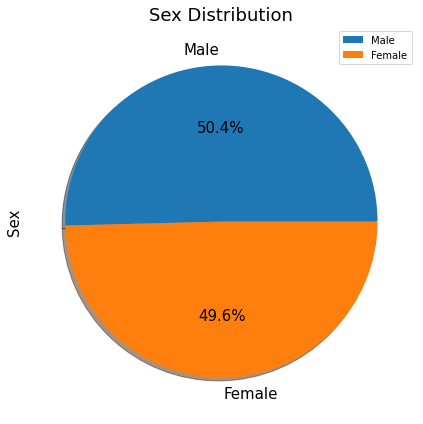

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#filtering data frame to chart pie plot
drop_dup = clean_df.drop_duplicates(subset=['Mouse ID'])
gender_counts = drop_dup['Sex'].value_counts()

#create pie plot using pandas
ax = gender_counts.plot(kind='pie', figsize= (11,6), autopct='%1.1f%%', shadow=True, legend=True, textprops={'fontsize': 15})
ax.set_title('Sex Distribution').set_fontsize(18)
ax.set_ylabel('Sex').set_fontsize(15)

#display pie plot
plt.tight_layout()
plt.show()

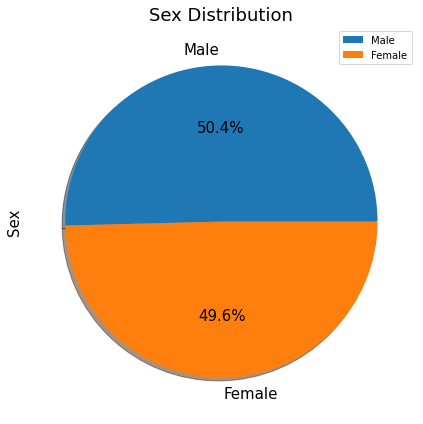

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#create labels and x axis
labels = 'Male', 'Female'
x_axis = drop_dup['Sex'].value_counts()

#set fig size and font size equal to panda pie chart
plt.figure(figsize=(11,6))
textprops = {'fontsize': 15}

#create pie plot using plotlib
plt.pie(x_axis, labels=labels, autopct="%1.1f%%", shadow=True, textprops = textprops)

#axis labels and legend
plt.title('Sex Distribution').set_fontsize(18)
plt.ylabel('Sex').set_fontsize(15)
plt.legend(loc='best')

#display pie chart
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
group_cap = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', :]
group_ram = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane', :]
group_inf = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol', :]
group_cef = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin', :]
# Start by getting the last (greatest) timepoint for each mouse
#Capomulin
last_cap = group_cap.groupby(['Mouse ID']).max()['Timepoint']
last_cap_df = pd.DataFrame(last_cap)

#Ramicane
last_ram = group_ram.groupby(['Mouse ID']).max()['Timepoint']
last_ram_df = pd.DataFrame(last_ram)

#Infubinol
last_inf = group_inf.groupby(['Mouse ID']).max()['Timepoint']
last_inf_df = pd.DataFrame(last_inf)

#Ceftamin
last_cef = group_cef.groupby(['Mouse ID']).max()['Timepoint']
last_cef_df = pd.DataFrame(last_cef)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_cap = pd.merge(last_cap_df, clean_df, on=('Mouse ID', 'Timepoint'))
merge_ram = pd.merge(last_ram_df, clean_df, on=('Mouse ID', 'Timepoint'))
merge_inf = pd.merge(last_inf_df, clean_df, on=('Mouse ID', 'Timepoint'))
merge_cef = pd.merge(last_cef_df, clean_df, on=('Mouse ID', 'Timepoint'))

In [15]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
#Capomulin
tumor_cap = merge_cap['Tumor Volume (mm3)']
quartiles = tumor_cap.quantile([.25,.5,.75])
lq_cap = quartiles[0.25]
uq_cap = quartiles[0.75]
iqr_cap = uq_cap-lq_cap
# Determine outliers using upper and lower bounds
low_cap = lq_cap - (1.5*iqr_cap)
up_cap = uq_cap + (1.5*iqr_cap)
print(f"Values below {low_cap} could be potential outliers for the Capomulin regimen.")
print(f"Values above {up_cap} could be potential outliers for the Capomulin regimen.")

Values below 20.70456164999999 could be potential outliers for the Capomulin regimen.
Values above 51.83201549 could be potential outliers for the Capomulin regimen.


In [16]:
#Ramicane
tumor_ram = merge_ram['Tumor Volume (mm3)']
quartiles = tumor_ram.quantile([.25,.5,.75])
lq_ram = quartiles[0.25]
uq_ram = quartiles[0.75]
iqr_ram = uq_ram-lq_ram
# Determine outliers using upper and lower bounds
low_ram = lq_ram - (1.5*iqr_ram)
up_ram = uq_ram + (1.5*iqr_ram)
print(f"Values below {low_ram} could be potential outliers for the Capomulin regimen.")
print(f"Values above {up_ram} could be potential outliers for the Capomulin regimen.")

Values below 17.912664470000003 could be potential outliers for the Capomulin regimen.
Values above 54.30681135 could be potential outliers for the Capomulin regimen.


In [17]:
#Infubinol
tumor_inf = merge_inf['Tumor Volume (mm3)']
quartiles = tumor_inf.quantile([.25,.5,.75])
lq_inf = quartiles[0.25]
uq_inf = quartiles[0.75]
iqr_inf = uq_inf-lq_inf
# Determine outliers using upper and lower bounds
low_inf = lq_inf - (1.5*iqr_inf)
up_inf = uq_inf + (1.5*iqr_inf)
print(f"Values below {low_inf} could be potential outliers for the Capomulin regimen.")
print(f"Values above {up_inf} could be potential outliers for the Capomulin regimen.")

Values below 36.83290494999999 could be potential outliers for the Capomulin regimen.
Values above 82.74144559000001 could be potential outliers for the Capomulin regimen.


In [18]:
#Ceftamin
tumor_cef = merge_cef['Tumor Volume (mm3)']
quartiles = tumor_cef.quantile([.25,.5,.75])
lq_cef = quartiles[0.25]
uq_cef = quartiles[0.75]
iqr_cef = uq_cef-lq_cef
# Determine outliers using upper and lower bounds
low_cef = lq_cef - (1.5*iqr_cef)
up_cef = uq_cef + (1.5*iqr_cef)
print(f"Values below {low_cef} could be potential outliers for the Capomulin regimen.")
print(f"Values above {up_cef} could be potential outliers for the Capomulin regimen.")

Values below 25.355449580000002 could be potential outliers for the Capomulin regimen.
Values above 87.66645829999999 could be potential outliers for the Capomulin regimen.


{'whiskers': [<matplotlib.lines.Line2D at 0x26adbac0b00>,
 'caps': [<matplotlib.lines.Line2D at 0x26adbace240>,
 'boxes': [<matplotlib.lines.Line2D at 0x26adbac07f0>,
 'medians': [<matplotlib.lines.Line2D at 0x26adbace940>,
 'fliers': [<matplotlib.lines.Line2D at 0x26adbacecc0>,
 'means': []}

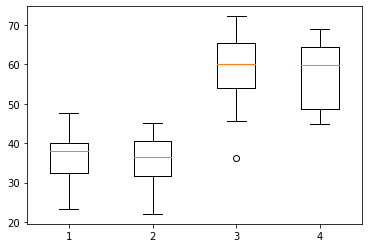

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_regi = [tumor_cap, tumor_ram, tumor_inf, tumor_cef]
fig1, ax1 = plt.subplots()
ax1.boxplot(drug_regi)


## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
